<a href="https://colab.research.google.com/github/anderomeda371/firstrepo/blob/main/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
dataset=pd.read_csv("/content/Position_Salaries.csv")

In [70]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [71]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values


In [72]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
# from sklearn.preprocessing import StandardScaler
# sc1=StandardScaler()
# X_train=sc1.fit_transform(X_train.reshape(-1,1))
# sc2=StandardScaler()
# y_train=sc2.fit_transform(y_train.reshape(-1,1))


from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
X=sc1.fit_transform(X.reshape(-1,1))
sc2=StandardScaler()
y=sc2.fit_transform(y.reshape(-1,1))

In [75]:
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(X,y)
y_predict=regressor.predict(sc1.transform(X.reshape(-1,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
y_predict

array([-0.2421045 , -0.30078456, -0.3625491 , -0.42451604, -0.48342382,
       -0.53598455, -0.579279  , -0.61112552, -0.63035603, -0.63694919])

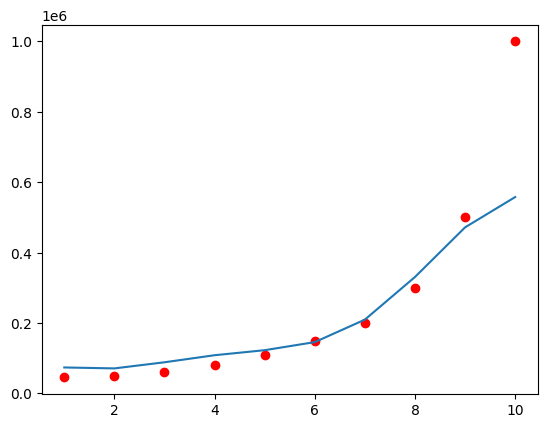

In [77]:
plt.scatter(sc1.inverse_transform(X),sc2.inverse_transform(y),c="red")
y_plot=regressor.predict((X.reshape(-1,1)))
y_plot=y_plot.reshape(-1,1)
y_plot=sc2.inverse_transform(y_plot)
y_plot
plt.plot(sc1.inverse_transform(X.reshape(-1,1)),y_plot)
# plt.scatter(sc1.inverse_transform(X_train),y_plot,c="blue")

In [83]:
y_pred=regressor.predict(sc1.transform([[8]]))
y_pred=sc2.inverse_transform(y_pred.reshape(-1,1))
y_pred

array([[330606.89204569]])